# CAB420 Assignment 1A Question 3: Template and Utilities Demo
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a quick demo and overview of the provided utility functions to help with Assignment 1A, Question 3.

It also implements the SVM that you are to compare against when responsing to the question.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

## Utility Functions

The following cell contains utility functions to:
* Load the data
* Vectorise the data
* Plot images
* Resize all images
* Convert images to grayscale

These are provided to assist you in developing your solution.

In [15]:
#
# Utility functions for CAB420, Assignment 1A, Q3
# Author: Simon Denman (s.denman@qut.edu.au)
#

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from scipy.io import loadmat        # to load mat files
import matplotlib.pyplot as plt     # for plotting
import numpy as np                  # for reshaping, array manipulation
import cv2                          # for colour conversion
import tensorflow as tf             # for bulk image resize
import keras

# Load data for Q3
#  train_path: path to training data mat file
#  test_path:  path to testing data mat file
#
#  returns:    arrays for training and testing X and Y data
#
def load_data(train_path, test_path):

    # load files
    train = loadmat(train_path)
    test = loadmat(test_path)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    train_X = np.transpose(train['train_X'], (3, 0, 1, 2)) / 255.0
    train_Y = train['train_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    train_Y[train_Y == 10] = 0
    train_Y = np.reshape(train_Y, -1)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    test_X = np.transpose(test['test_X'], (3, 0, 1, 2)) / 255.0
    test_Y = test['test_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    test_Y[test_Y == 10] = 0
    test_Y = np.reshape(test_Y, -1)

    # return loaded data
    return train_X, train_Y, test_X, test_Y

# vectorise an array of images, such that the shape is changed from {samples, width, height, channels} to
# (samples, width * height * channels)
#   images: array of images to vectorise
#
#   returns: vectorised array of images
#
def vectorise(images):
    # use numpy's reshape to vectorise the data
    return np.reshape(images, [len(images), -1])

# Plot some images and their labels. Will plot the first 100 samples in a 10x10 grid
#  x: array of images, of shape (samples, width, height, channels)
#  y: labels of the images
#
def plot_images(x, y):
    fig = plt.figure(figsize=[15, 18])
    for i in range(100):
        ax = fig.add_subplot(10, 10, i + 1)
        ax.imshow(x[i,:])
        ax.set_title(y[i])
        ax.axis('off')

# Resize an array of images
#  images:   array of images, of shape (samples, width, height, channels)
#  new_size: tuple of the new size, (new_width, new_height)
#
#  returns:  resized array of images, (samples, new_width, new_height, channels)
#
def resize(images, new_size):
    # tensorflow has an image resize funtion that can do this in bulk
    # note the conversion back to numpy after the resize
    return tf.image.resize(images, new_size).numpy()
          
# Convert images to grayscale
#   images:  array of colour images to convert, of size (samples, width, height, 3)
#
#   returns: array of converted images, of size (samples, width, height, 1)
#
def convert_to_grayscale(images):
    # storage for converted images
    gray = []
    # loop through images
    for i in range(len(images)):
        # convert each image using openCV
        gray.append(cv2.cvtColor(images[i,:], cv2.COLOR_BGR2GRAY))
    # pack converted list as an array and return
    return np.expand_dims(np.array(gray), axis = -1)

## Utility Function Demonstration

The following presents a brief demonstration of the utility functions. These portions of code do not form part of the template, or solution, and could be commented out/removed.

### Data Loading

Load the data, and visualise images.

(1000, 32, 32, 3)
(1000,)
(10000, 32, 32, 3)
(10000,)


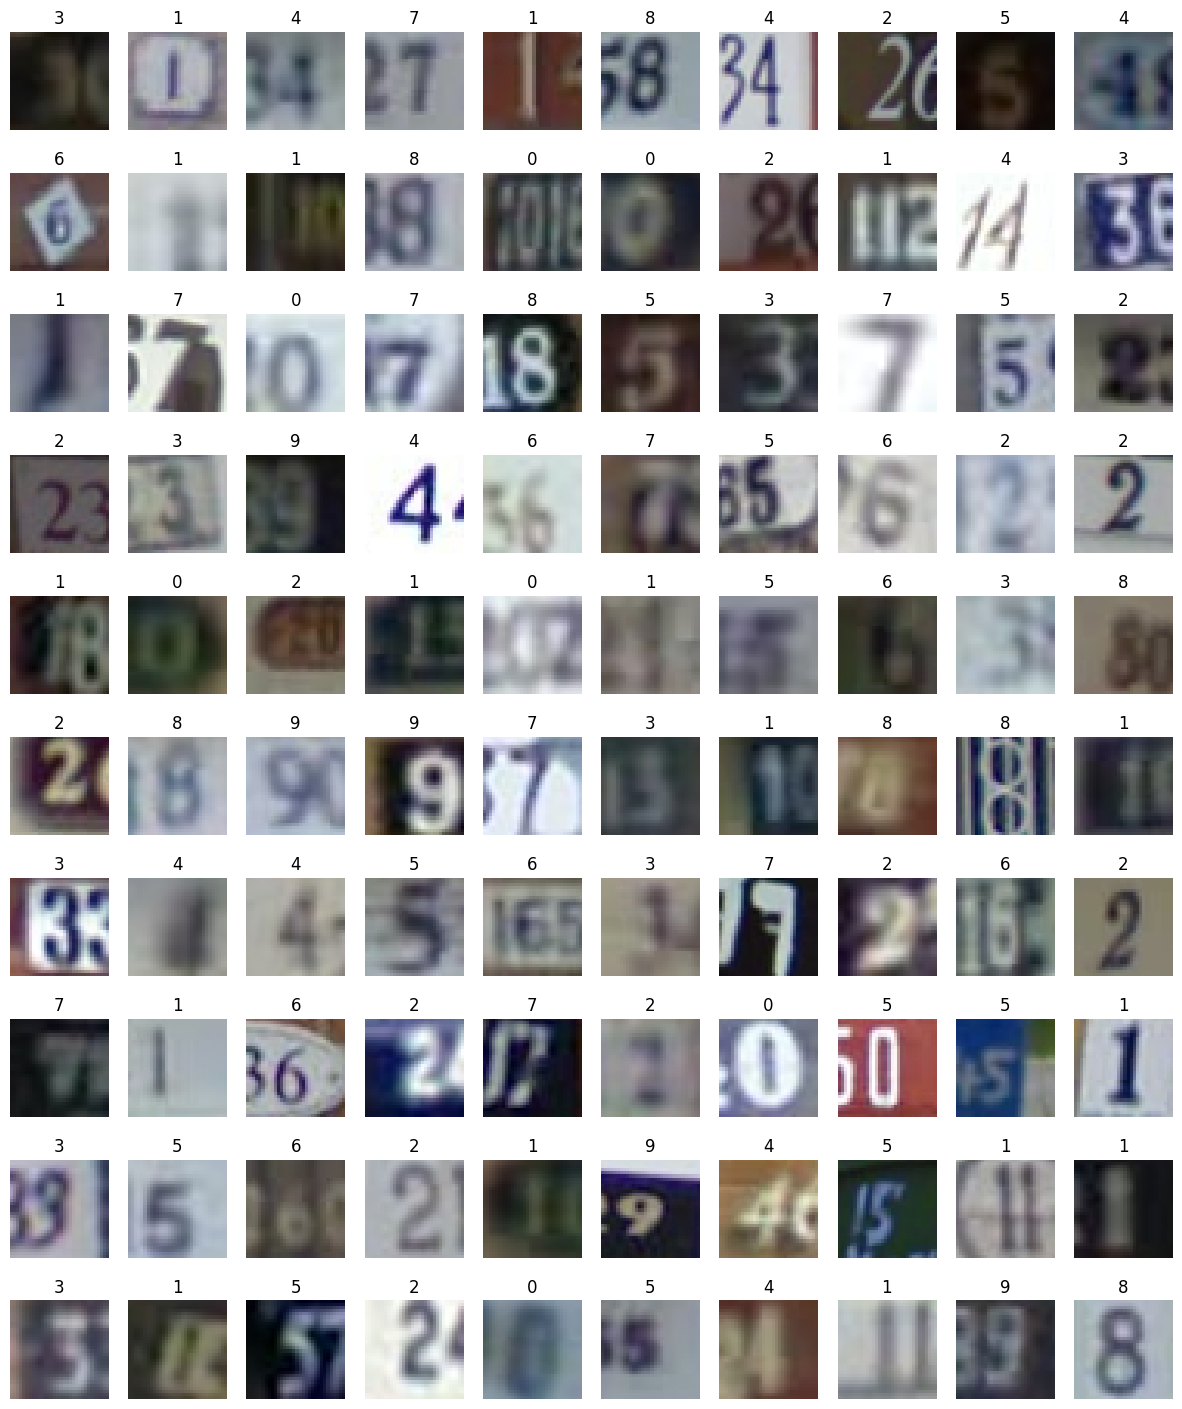

In [3]:
train_X, train_Y, test_X, test_Y = load_data('Data/Q3/q3_train.mat', 'Data/Q3/q3_test.mat')

# check shape of data
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

# visualise images as a sanity check
plot_images(train_X, train_Y)

### Vectorise Data

To train an SVM, each sample needs to be a vector rather than an image.

In [4]:
train_vector_X = vectorise(train_X)
test_vector_X = vectorise(test_X)
print(train_vector_X.shape)
print(test_vector_X.shape)

(1000, 3072)
(10000, 3072)


### Conversion and Resizing

You may wish to either:
* Resize images
* Convert images to grayscale

Two functions are provided to do this, and can be used in combination as shown below.

(1000, 20, 20, 1)


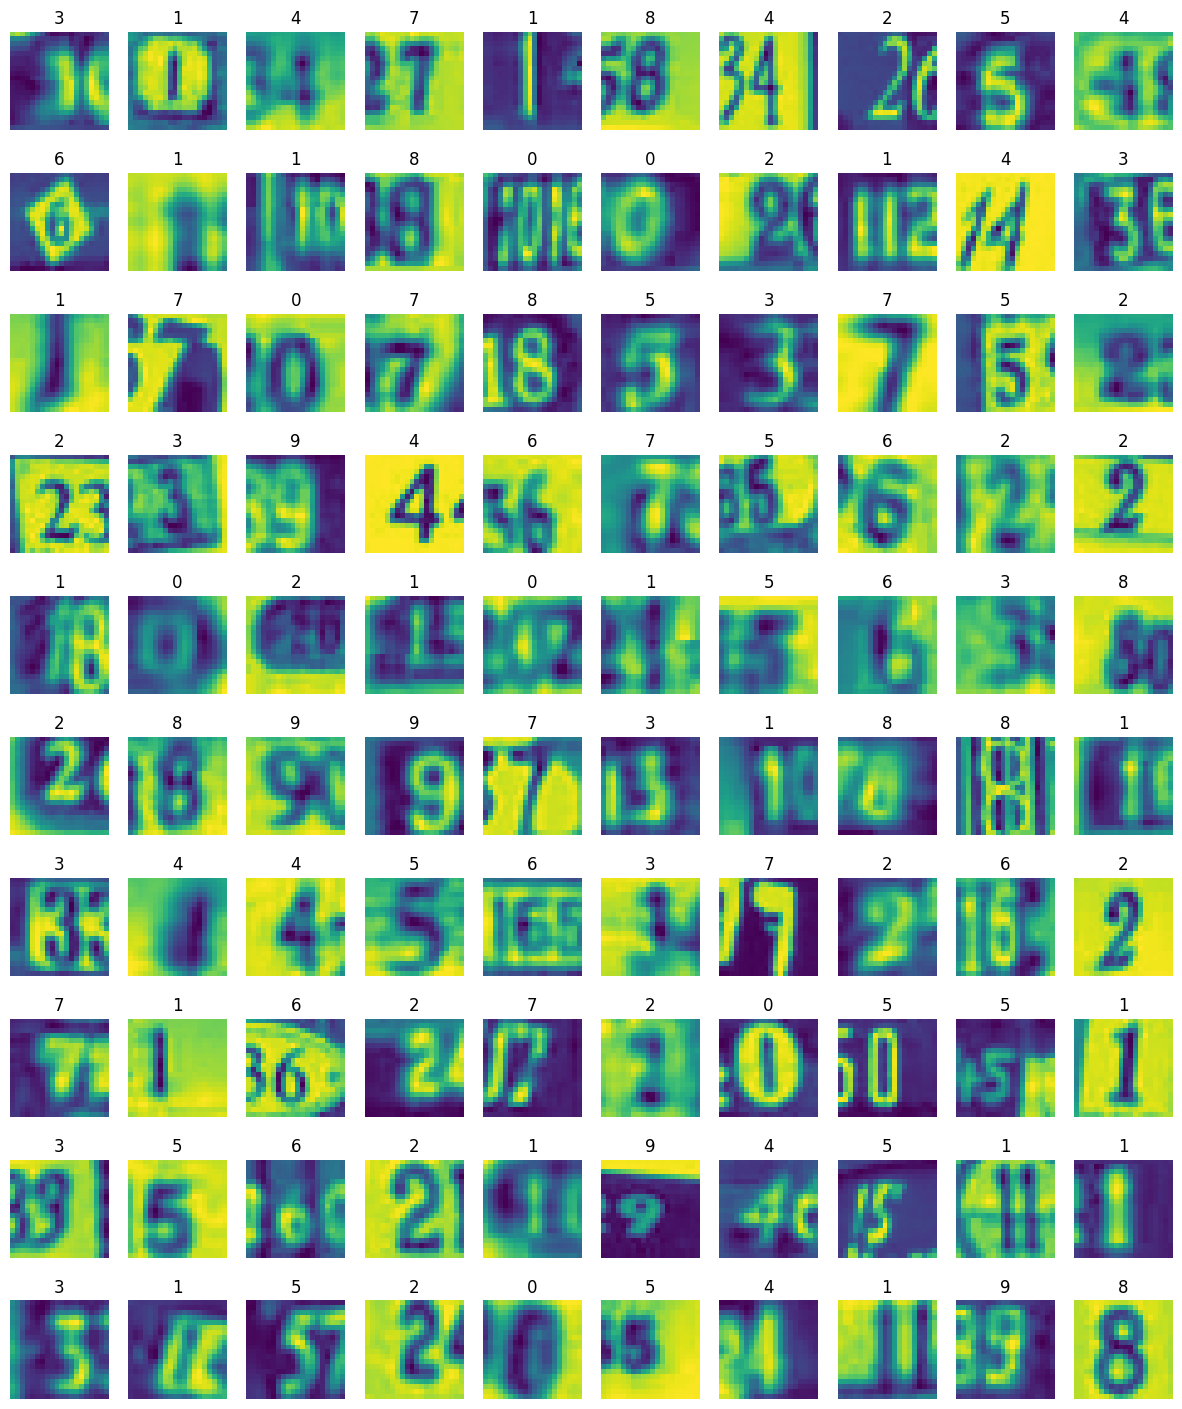

In [5]:
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))
print(train_X_small.shape)
plot_images(train_X_small, train_Y)

### Measuring Time

There are a lot of ways to measure time in python. A simple one is to use ``process_time`` within the ``time`` package. This will simply measure the ellapsed process time in seconds. We can use ths to measure individual parts of our code as follows:

In [7]:
# import process_time
from time import process_time

# get a start time
time_1 = process_time()

# do some stuff, in this case we'll just load some data
train_X, train_Y, test_X, test_Y = load_data('Data/Q3/q3_train.mat', 'Data/Q3/q3_test.mat')

# get the end time of our first lot of "stuff"
time_2 = process_time()

# do some other stuff
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))

# get the end time of our first lot of "stuff"
time_3 = process_time()

# the time it took to do "our stuff" is just the difference between the start and end times
print('Time to load data:   %f seconds' % (time_2 - time_1))
print('Time to resize data: %f seconds' % (time_3 - time_2))

Time to load data:   0.187500 seconds
Time to resize data: 0.031250 seconds


## Question 3 Template

The following provides a starting point for your solution. It trains the SVM that you are to compare your trained DCNNs against, and measures the time taken to train this SVM, and to perform inference with the train and test sets.

This does not measure the performance of the SVM - you will need to implement this as part of your solution.

Training Time: 1.250000
Inference Time (training set): 0.937500
Inference Time (testing set): 17.031250
F1 Score (Training): 0.8766068570290552
F1 Score (Testing): 0.3314055668310933


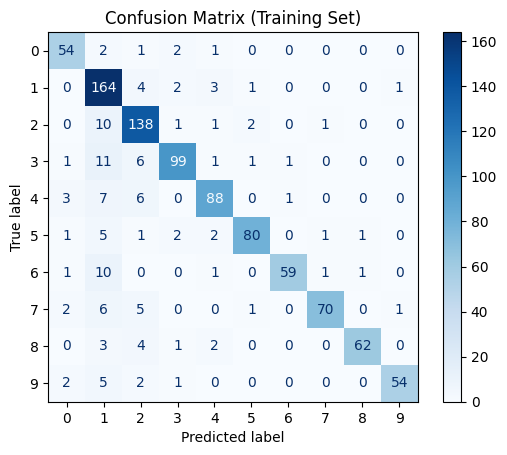

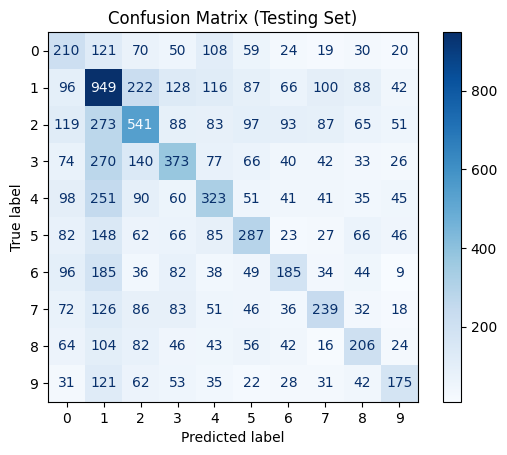

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from time import process_time

# load data
train_X, train_Y, test_X, test_Y = load_data('Data/Q3/q3_train.mat', 'Data/Q3/q3_test.mat')

# you may want to split the data to obtain a validation set. This is not needed, but if you wish to you would do
# this here

# any resize, colour change, etc, would go here

# vectorise data
# If you do any resize, reshape, etc of the data prior to putting this into your DCNN, change this code to 
# vectorise that verison of the data. The same data should be used by all models for a fair comparison; though
# you will only vectorise the data for the SVM (i.e. the DCNN will get the data as images).
train_vector_X = vectorise(train_X)
test_vector_X = vectorise(test_X)

# train the SVM
# measure the start time of training
svm_train_start = process_time()
# run the training - note that you don't need to change any parameters here except potentially for the input data is you 
# resize, change colour, etc
svm = SVC(C = 1.0, kernel = 'linear').fit(train_vector_X, train_Y)
# record the end time of the training
svm_train_end = process_time()
# predict on the training set
train_predictions = svm.predict(train_vector_X)
# measure of the time of the training set prediction
svm_train_pred_end = process_time()
# predict on the test set
test_predictions = svm.predict(test_vector_X)
# measure the end time on the prediction of the test set
svm_test_pred_end = process_time()

# check how long the SVM took to train
svm_train_time = svm_train_end - svm_train_start
# check how long the SVM took to perform inference on the training set
svm_inference_train_time = svm_train_pred_end - svm_train_end
# check how long the SVM took to perform inference on the testing set
svm_inference_test_time = svm_test_pred_end - svm_train_pred_end
# print some times
print('Training Time: %f\nInference Time (training set): %f\nInference Time (testing set): %f' % \
      (svm_train_time, svm_inference_train_time, svm_inference_test_time))

# evaluate SVM
# here you can insert whatever evaluation metrics you feel are appropriate, though F1 and a confusion matrix would be a fair
# option

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

# Calculate F1 score
f1_train = f1_score(train_Y, train_predictions, average='macro')
f1_test = f1_score(test_Y, test_predictions, average='macro')

print('F1 Score (Training):', f1_train)
print('F1 Score (Testing):', f1_test)

# Generate confusion matrix
cm_train = confusion_matrix(train_Y, train_predictions)
cm_test = confusion_matrix(test_Y, test_predictions)

# Display confusion matrix with class labels if available
try:
    labels = sorted(set(train_Y) | set(test_Y))
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
    disp_train.plot(cmap='Blues')
    plt.title('Confusion Matrix (Training Set)')
    plt.show()

    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
    disp_test.plot(cmap='Blues')
    plt.title('Confusion Matrix (Testing Set)')
    plt.show()
except Exception as e:
    print("Error displaying confusion matrix:", e)


In [17]:
import time
import keras
from keras import layers
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set random seed for reproducibility
random_seed = 69
np.random.seed(random_seed)

train_X, train_Y, test_X, test_Y = load_data('Data/Q3/q3_train.mat', 'Data/Q3/q3_test.mat')

# Convert labels to categorical format
train_Y_cat = to_categorical(train_Y, num_classes=10)
test_Y_cat = to_categorical(test_Y, num_classes=10)

def eval_model(model, train, train_y, test, test_y):
    fig = plt.figure(figsize=[20, 8])

    ax = fig.add_subplot(1, 2, 1)
    pred_train = model.predict(train)
    pred_train_classes = np.argmax(pred_train, axis=1)
    f1_train = f1_score(np.argmax(train_y, axis=1), pred_train_classes, average='weighted')
    cm_train = confusion_matrix(np.argmax(train_y, axis=1), pred_train_classes)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Training Set Confusion Matrix\nF1 Score: {f1_train:.4f}')

    ax = fig.add_subplot(1, 2, 2)
    pred_test = model.predict(test)
    pred_test_classes = np.argmax(pred_test, axis=1)
    f1_test = f1_score(np.argmax(test_y, axis=1), pred_test_classes, average='weighted')
    cm_test = confusion_matrix(np.argmax(test_y, axis=1), pred_test_classes)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Testing Set Confusion Matrix for Non-augmented Data\nF1 Score: {f1_test:.4f}')
    plt.show()


def train_and_eval(model, train, train_y, test, test_y, use_augmentation=False):
    if use_augmentation:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )
        datagen.fit(train)
        start_time_train = time.time()
        history = model.fit(datagen.flow(train, train_y, batch_size=32), epochs=50, validation_data=(test, test_y), verbose=True,
                            callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)])
        end_time_train = time.time()
    else:
        model.compile(
            loss='categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy'],
            jit_compile=False
        )
        start_time_train = time.time()
        history = model.fit(train, train_y, batch_size=32, epochs=30, validation_data=(test, test_y), verbose=True,
                            callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)])
        end_time_train = time.time()

    train_time = end_time_train - start_time_train

    # Measure inference time on training set
    start_time_inference_train = time.time()
    model.predict(train)
    end_time_inference_train = time.time()
    inference_time_train = end_time_inference_train - start_time_inference_train

    # Measure inference time on test set
    start_time_inference_test = time.time()
    model.predict(test)
    end_time_inference_test = time.time()
    inference_time_test = end_time_inference_test - start_time_inference_test

    # Plotting training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss for Model Trained without Data Augmentation')
    plt.legend()
    plt.show()

    eval_model(model, train, train_y, test, test_y)

    return train_time, inference_time_train, inference_time_test

from tensorflow.keras import layers, models

# Model architecture
inputs = layers.Input(shape=(32, 32, 3), name='img')

# First block with batch norm and spatial dropout
x = layers.Conv2D(filters=32, kernel_size=(7, 7), activation='swish', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=(7, 7), activation='swish', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)  # Dropout 20% of the maps
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

# Second block with batch norm and spatial dropout
x = layers.Conv2D(filters=64, kernel_size=(5, 5), activation='swish', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=(5, 5), activation='swish', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.3)(x)  # Dropout 30% of the maps
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

# Third block with batch norm and spatial dropout
x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='swish', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='swish', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.4)(x)  # Dropout 40% of the maps
x = layers.MaxPooling2D(pool_size=(3, 3))(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='swish')(x)

outputs = layers.Dense(10, activation='softmax')(x)

# Create the model
model = models.Model(inputs, outputs)
model.summary()


# Create the model
model = keras.models.Model(inputs=inputs, outputs=outputs)

# Train and evaluate the model without data augmentation
train_time_no_aug, inference_time_train_no_aug, inference_time_test_no_aug = train_and_eval(model, train_X, train_Y_cat, test_X, test_Y_cat, use_augmentation=False)
print(f"Training time without augmentation: {train_time_no_aug:.2f} seconds")
print(f"Inference time on training set without augmentation: {inference_time_train_no_aug:.2f} seconds")
print(f"Inference time on test set without augmentation: {inference_time_test_no_aug:.2f} seconds")

# Train and evaluate the model with data augmentation
train_time_aug, inference_time_train_aug, inference_time_test_aug = train_and_eval(model, train_X, train_Y_cat, test_X, test_Y_cat, use_augmentation=True)
print(f"Training time with augmentation: {train_time_aug:.2f} seconds")
print(f"Inference time on training set with augmentation: {inference_time_train_aug:.2f} seconds")
print(f"Inference time on test set with augmentation: {inference_time_test_aug:.2f} seconds")


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 472ms/step - accuracy: 0.1645 - loss: 2.2879 - val_accuracy: 0.1894 - val_loss: 2.2403
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 461ms/step - accuracy: 0.1722 - loss: 2.2636 - val_accuracy: 0.1894 - val_loss: 2.2417
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 465ms/step - accuracy: 0.1689 - loss: 2.2598 - val_accuracy: 0.1895 - val_loss: 2.2502
Epoch 4/50
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.1773 - loss: 2.2786

KeyboardInterrupt: 

In [ ]:
# For your write-up, you should include:
# - briefly mention any pre-processing you did and why
# - outline your network design, and training approach. The discussion of training should note how long the model was trained
#   for, and if it converged. If you observe the non-augmented and augmented networks training at different rates, discuss that
#   here
# - outline your data augmentation, and briefly justify why these methods were chosen.
# - an evaluation and comparison of three models, which should highlight any differences observed between the models, and the
#   inference time of the three models
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT